In [1]:
# Model Performance Evaluation
# Module-6

In [2]:
# In our Textbook. Confusion matrix:  Predicted labels are rows and actual labels are columns. 
#

<img src="https://c3.ai/wp-content/uploads/2021/04/C3AI_MachineLearningforManagers_Figure15-1.svg" width="400">


<img src="https://c3.ai/wp-content/uploads/2021/04/C3AI_MachineLearningforManagers_Precision.svg" width="700">



<img src="https://c3.ai/wp-content/uploads/2021/04/C3AI_MachineLearningforManagers_Recall-1.svg" width="700">

<img src="https://c3.ai/wp-content/uploads/2021/04/C3AI_MachineLearningforManagers_F1Score-1.png" width="400">

In [3]:
# Confusion matrix values from the example
TP = 50  # True Positives
TN = 35  # True Negatives
FP = 5   # False Positives
FN = 10  # False Negatives

# Total number of instances
total = TP + TN + FP + FN

# Accuracy calculation
accuracy = (TP + TN) / total

# Error rate calculation
error_rate = 1 - accuracy

# Display results
print(f"Confusion Matrix:")
print(f"                 Actual: Positive    Actual: Negative")
print(f"Predicted: Positive   {TP} (TP)           {FP} (FP)")
print(f"Predicted: Negative   {FN} (FN)           {TN} (TN)")
print()
print(f"Accuracy  = {accuracy:.2f}  ({accuracy:.0%})")
print(f"Error rate = {error_rate:.2f}  ({error_rate:.0%})")

Confusion Matrix:
                 Actual: Positive    Actual: Negative
Predicted: Positive   50 (TP)           5 (FP)
Predicted: Negative   10 (FN)           35 (TN)

Accuracy  = 0.85  (85%)
Error rate = 0.15  (15%)


In [4]:
# Precision calculation
Precision = TP  / (TP+FP)
print(f"Precision = {Precision:.2f}")

# Recall calculation
Recall = TP / (TP + FN)
print(f"Recall = {Recall:.2f}")

Precision = 0.91
Recall = 0.83


In [5]:
## Using sklearn for evaluation metrics.
#n sklearn Confusion Matrix, it's the opposite. Predicted labels are columns and actual labels are rows.

In [6]:
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    average_precision_score, 
    auc,
    roc_curve, 
    confusion_matrix
)

# Example true labels and predicted probabilities
y_true = [1,1, 0, 0, 1, 1, 0 , 0]  # True labels
y_scores = [0.2, 0.9, 0.1, 0.4, 0.35, 0.8, 0.7, 0.1]  # Predicted probabilities for the positive class
y_pred = [1 if score >= 0.5 else 0 for score in y_scores]  # Predicted labels based on a threshold of 0.5


In [7]:
y_pred

[0, 1, 0, 0, 0, 1, 1, 0]

In [8]:
# confusion_matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[3 1]
 [2 2]]


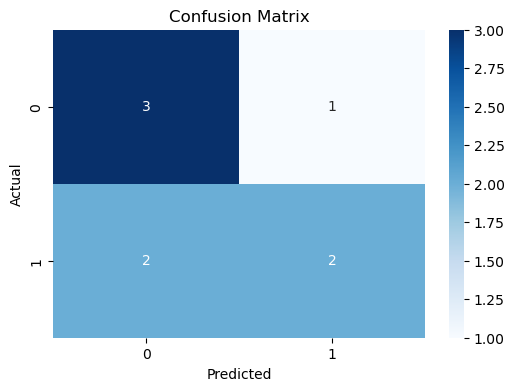

In [9]:
# plotting confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [10]:
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.62
Precision: 0.67
Recall: 0.50
F1 Score: 0.57


## AUC ROC Curve in Machine Learning
- True Positive Rate (TPR): how often the model correctly predicts the positive cases also known as Sensitivity or Recall.
- False Positive Rate (FPR): how often the model incorrectly predicts a negative case as positive.
- Specificity: measures the proportion of actual negatives that the model correctly identifies. It is calculated as 1 - FPR.


<img src="https://media.geeksforgeeks.org/wp-content/uploads/20250804094411616734/111.webp" width="600">

<img src="https://www.blog.trainindata.com/wp-content/uploads/2024/09/ROC-and-Model-Performance.png" width="400">

In [11]:
roc_auc = roc_auc_score(y_true, y_scores)
avg_precision = average_precision_score(y_true, y_scores)
print(f"ROC AUC: {roc_auc:.2f}")
print(f"Average Precision (PR AUC): {avg_precision:.2f}")

ROC AUC: 0.75
Average Precision (PR AUC): 0.82


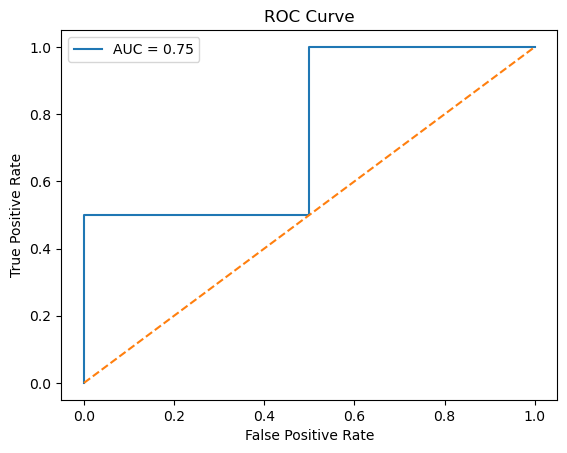

In [12]:
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_true, y_scores)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


## Types of misclassification errors

From the confusion matrix:

- False Positive (FP) → Predict positive when actual is negative
- False Negative (FN) → Predict negative when actual is positive

Misclassification cost lets us weight FP and FN differently.

Example:

- Spam filter
   - FP (important email → spam) = high cost
   - FN (spam → inbox) = low cost

- Medical diagnosis
   - FN (missed disease) = very high cost

In [13]:
# Example costs
cost_fp = 1     # cost of false positive
cost_fn = 5     # cost of false negative

# From earlier confusion matrix
FP = 5
FN = 10
total = TP + TN + FP + FN

total_cost = FP * cost_fp + FN * cost_fn
avg_cost = total_cost / total

print(f"Total misclassification cost: {total_cost}")
print(f"Average cost per prediction: {avg_cost:.2f}")


Total misclassification cost: 55
Average cost per prediction: 0.55


In [14]:
# Example page 22
TP = 30
FP = 10
FN = 5
TN = 50

print(f"Confusion Matrix:")
print(f"                 Actual: Positive    Actual: Negative")
print(f"Predicted: Positive   {TP} (TP)           {FP} (FP)")
print(f"Predicted: Negative   {FN} (FN)           {TN} (TN)")
print()

Confusion Matrix:
                 Actual: Positive    Actual: Negative
Predicted: Positive   30 (TP)           10 (FP)
Predicted: Negative   5 (FN)           50 (TN)



In [15]:
# Misclassification costs
cost_fp = 500     # Cost of False Positive
cost_fn = 5000    # Cost of False Negative

# Total number of cases
total = TP + FP + FN + TN

# Total misclassification cost
total_cost = (FP * cost_fp) + (FN * cost_fn)

# Average cost per prediction
average_cost = total_cost / total

# Display results
print("Confusion Matrix Values:")
print(f"TP = {TP}, FP = {FP}, FN = {FN}, TN = {TN}")
print()

print("Misclassification Costs:")
print(f"Cost of False Positive  = ${cost_fp}")
print(f"Cost of False Negative  = ${cost_fn}")
print()

print(f"Total Misclassification Cost = ${total_cost}")
print(f"Average Cost per Patient     = ${average_cost:.2f}")


Confusion Matrix Values:
TP = 30, FP = 10, FN = 5, TN = 50

Misclassification Costs:
Cost of False Positive  = $500
Cost of False Negative  = $5000

Total Misclassification Cost = $30000
Average Cost per Patient     = $315.79
